Got it 👍 You want to understand **pre-pruning** (also called *early stopping*) in Decision Trees, using the **Iris dataset**.

Let’s break it down step by step:

---

## 🌱 What is Pre-pruning?

When we build a **Decision Tree**, if we let it grow fully:

* It will split until all leaves are **pure** (only one class) or no more splits are possible.
* This usually causes **overfitting** (too complex tree).

**Pre-pruning** stops the tree **early** by setting constraints **while training**, so the tree does not grow unnecessarily deep.

---

## 🔑 Pre-pruning Parameters in scikit-learn

In `DecisionTreeClassifier` (from `sklearn.tree`), common pre-pruning parameters are:

* `max_depth`: maximum depth of the tree.
* `min_samples_split`: minimum number of samples needed to split a node.
* `min_samples_leaf`: minimum number of samples required at a leaf node.
* `max_leaf_nodes`: maximum number of leaf nodes.
* `min_impurity_decrease`: minimum impurity decrease required to split.

---

## 🏵 Example with Iris Dataset

Here’s a small implementation:

## 🎯 What You’ll See

* **Fully grown tree**: very detailed, many branches → risk of overfitting.
* **Pre-pruned tree**: shallower, simpler splits → better generalization.

---

✅ **Key takeaway**:
Pre-pruning prevents overfitting by restricting the complexity of the tree during training.

---

Would you like me to also show you **performance comparison** (accuracy of full tree vs pre-pruned tree on train/test split) so you can see why pruning is useful?


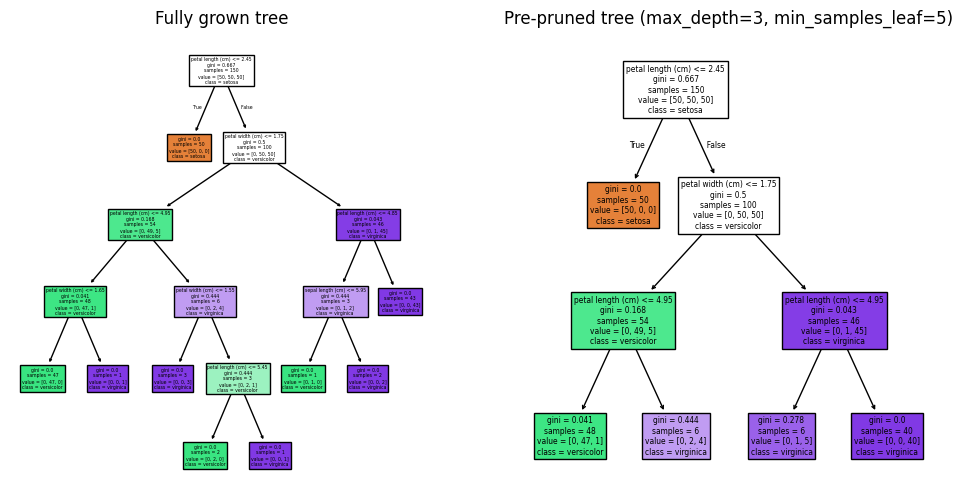

In [16]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Fully grown tree (no pruning)
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X, y)

# Pre-pruned tree (limit depth and min samples per leaf)
tree_pruned = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)
tree_pruned.fit(X, y)

# Plot comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_tree(tree_full, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Fully grown tree")

plt.subplot(1,2,2)
plot_tree(tree_pruned, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pre-pruned tree (max_depth=3, min_samples_leaf=5)")

plt.show()

Perfect 👍 You want to understand **both pre-pruning and post-pruning (cost complexity pruning)** on the **Iris dataset**.

---

# 🌱 Pre-pruning vs. 🌳 Post-pruning

### ✅ Pre-pruning

* Stops the tree from growing too much during training.
* Controlled by hyperparameters like `max_depth`, `min_samples_leaf`, etc.
* Prevents overfitting **before** it happens.

### ✅ Post-pruning (Cost Complexity Pruning, CCP)

* Let the tree grow fully first.
* Then prune it back by removing branches that don’t improve generalization.
* In scikit-learn → use the parameter `ccp_alpha`.

  * Higher `ccp_alpha` → more pruning.
  * `ccp_alpha=0` → no pruning (fully grown).

# 🎯 What You’ll See

* **Pre-pruned tree**: Controlled by depth/leaves → smaller tree right from the start.
* **Post-pruned tree**: Start with a full tree, then prune step by step → accuracy usually improves after removing unnecessary splits.

---

✅ **Key Takeaway**:

* **Pre-pruning** = avoid overfitting *while building* the tree.
* **Post-pruning** = fix overfitting *after* building the tree.

---

Do you want me to also give you a **side-by-side visualization of the post-pruned tree (best `ccp_alpha`) vs. full tree** like I did for pre-pruning?


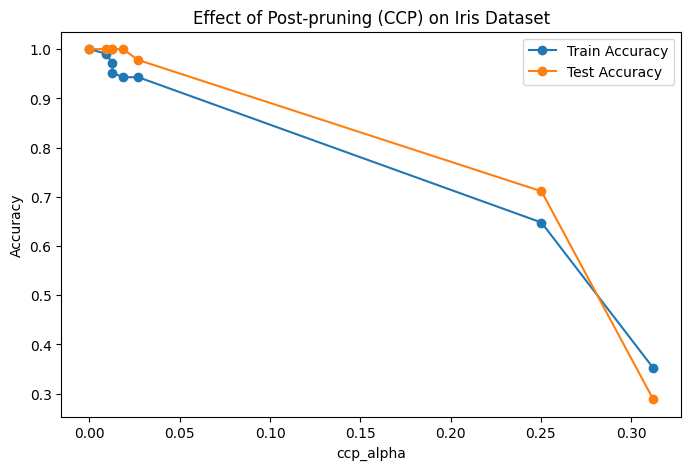

In [17]:
# 🏵 Example on Iris Dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# ----------------------------
# Pre-pruning Example
# ----------------------------
pre_pruned_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

# ----------------------------
# Post-pruning Example (Cost Complexity)
# ----------------------------
# Train a full tree first
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

# Get effective alphas
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train trees for different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# ----------------------------
# Compare Train vs Test Accuracy
# ----------------------------
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Post-pruning (CCP) on Iris Dataset")
plt.legend()
plt.show()


In [18]:
 #🔑 Step 1: Train a Full Tree and Get Pruning Path
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Full tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)

# Get cost complexity pruning path
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

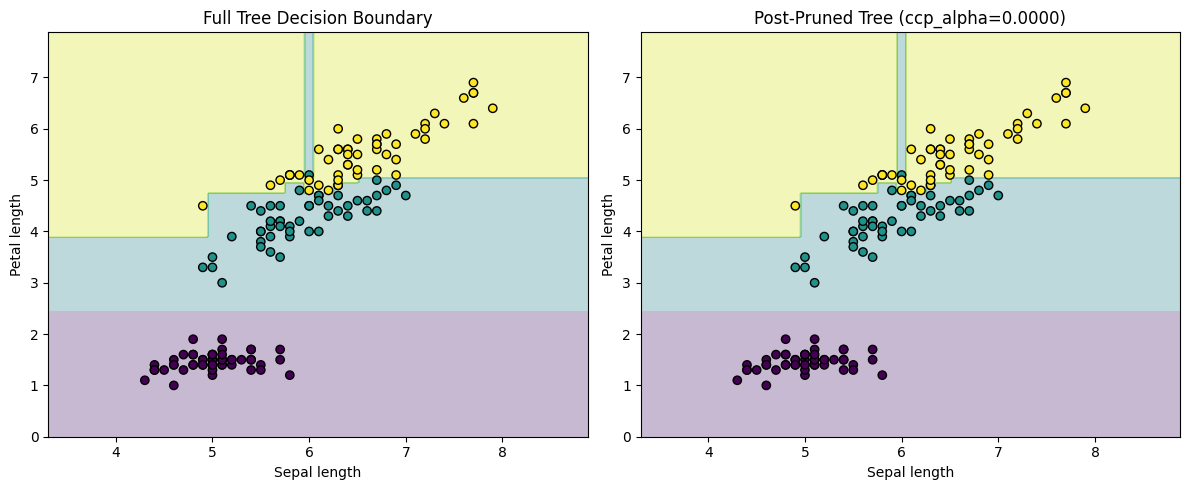

In [20]:
#🔑 Step 4: Decision Boundary Visualization

#(Use only 2 features for clarity, e.g., sepal length & petal length.)

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.xlabel("Sepal length")
    plt.ylabel("Petal length")
    plt.title(title)

# Reduce features for 2D visualization
X_2d = iris.data[:, [0, 2]]
y_2d = iris.target # Use the original y for visualization

# Find the best ccp_alpha based on test accuracy from the previous step
# Assuming test_scores and ccp_alphas are available from the previous cell
best_alpha_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_alpha_index]

# Train the pruned tree with the best ccp_alpha
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)

# Fit both classifiers using the reduced 2D data
clf_full.fit(X_2d, y_2d)
clf_pruned.fit(X_2d, y_2d)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_boundary(clf_full, X_2d, y_2d, "Full Tree Decision Boundary")

plt.subplot(1,2,2)
plot_decision_boundary(clf_pruned, X_2d, y_2d, f"Post-Pruned Tree (ccp_alpha={best_alpha:.4f})")

plt.tight_layout()
plt.show()